**Name - Arihant Gupta - E23CSEU0055**
<br>
**Batch - EB_02**
<br>
**Date - 12th Aug, 2025**
<br>
**CSET301-AIML-Lab-04**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1.	Load the California Housing dataset from sklearn.datasets into your Python environment using the fetch_california_housing() function.
2.	Convert the dataset into a Pandas DataFrame to facilitate exploration and manipulation of the features and target variable.

In [29]:
hd = fetch_california_housing()
df = pd.DataFrame(hd.data, columns=hd.feature_names)
df['MedHouseVal'] = hd.target
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

3.	Perform exploratory data analysis (EDA) by visualizing the distribution of key variables and checking for any correlations using tools like seaborn, matplotlib, and pandas.

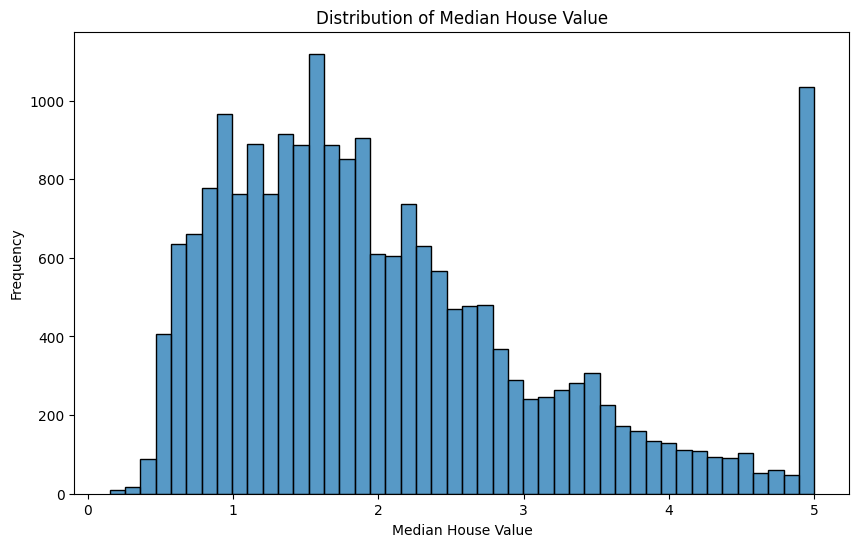

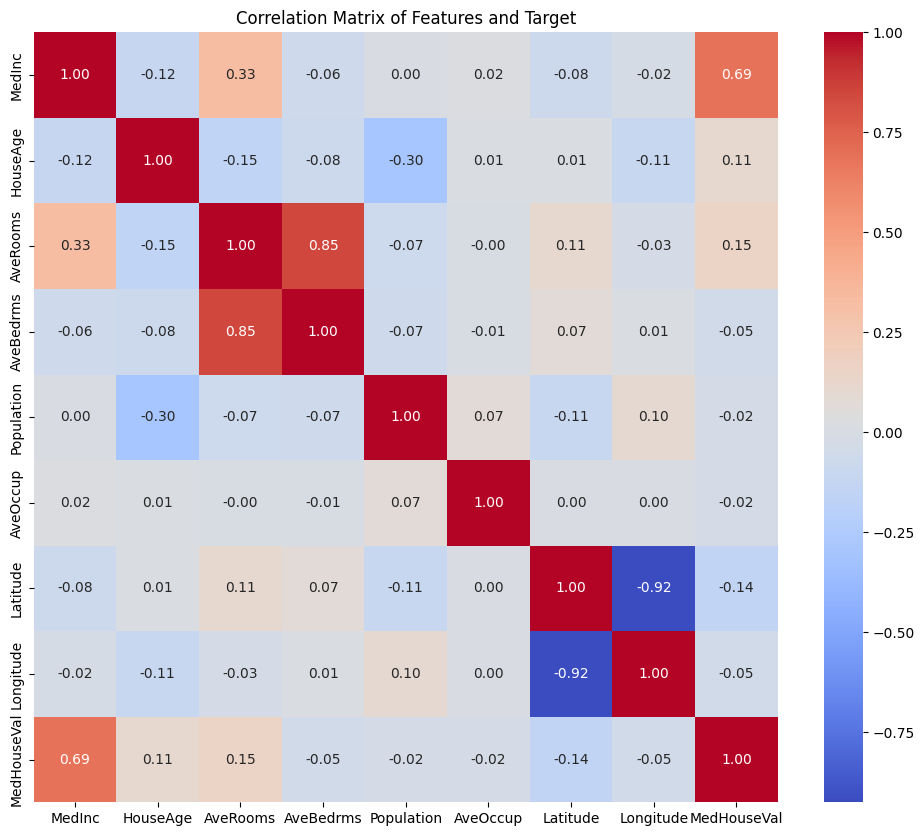

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'])
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()
plt.close()

plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target')
plt.show()
plt.close()

4.	From the available features, select only the relevant numerical attributes that are expected to influence the housing price prediction (e.g., average number of rooms, median income).

In [31]:
X = df[["MedInc", "AveRooms", "AveBedrms"]]
Y = df["MedHouseVal"]
print(X)
std_s = StandardScaler()
X_scaled = std_s.fit_transform(X)

       MedInc  AveRooms  AveBedrms
0      8.3252  6.984127   1.023810
1      8.3014  6.238137   0.971880
2      7.2574  8.288136   1.073446
3      5.6431  5.817352   1.073059
4      3.8462  6.281853   1.081081
...       ...       ...        ...
20635  1.5603  5.045455   1.133333
20636  2.5568  6.114035   1.315789
20637  1.7000  5.205543   1.120092
20638  1.8672  5.329513   1.171920
20639  2.3886  5.254717   1.162264

[20640 rows x 3 columns]


5.	Divide the dataset into training and testing subsets using train_test_split() from sklearn.model_selection, typically with an 80-20 split for training and testing respectively.
6.	Initialize and train a Linear Regression model from sklearn.linear_model using the training set's input features and target values.
7.	Evaluate the trained model on the test set using performance metrics such as the R² score and Mean Squared Error (MSE) from sklearn.metrics to quantify prediction accuracy.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
ll = LinearRegression()
ll.fit(X_train, y_train)
y_pred = ll.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2S = r2_score(y_test, y_pred)
print(f"MSE = {mse} & R^2 Score = {r2S}")

MSE = 0.6758542769446659 & R^2 Score = 0.48424172287652023


8.	Generate a scatter plot comparing predicted versus actual median house values to visually assess the model’s prediction capability and identify any patterns or biases.
9.	Interpret the evaluation metrics and comment on the model's strengths and weaknesses, and discuss possible limitations such as linearity assumptions, outliers, or feature multicollinearity.

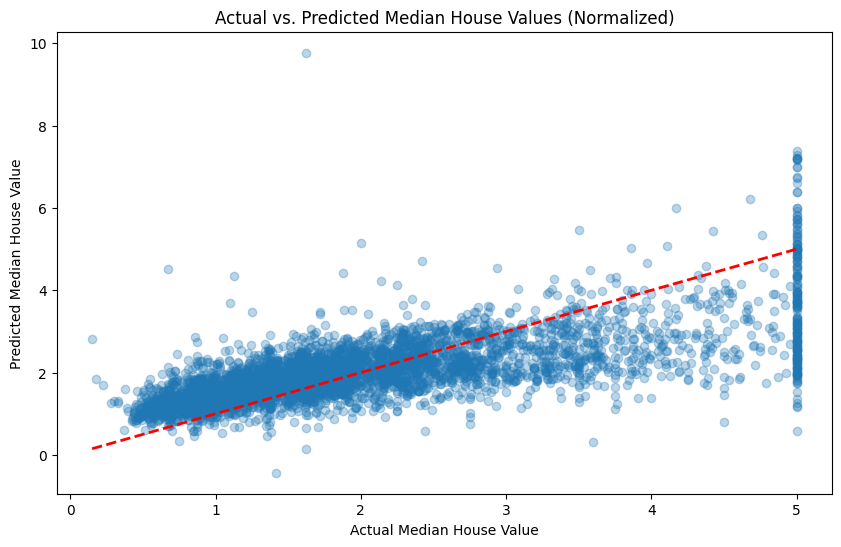

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Values (Normalized)')
plt.show()
plt.close()